анализ ЭЭГ

# Импорты

In [1]:
import sys

from src.utils.metrics_calculators import IMetricCalculator

modules_to_reload = [
    "src.utils.eeg_controller",
]

for module in modules_to_reload:
    if module in sys.modules:
        del sys.modules[module]

%load_ext autoreload
%autoreload 2

import gc
from pathlib import Path

import matplotlib.pyplot as plt
import mne
import numpy as np
import tensorly as tl
import torch
from dotenv import load_dotenv

%matplotlib notebook

# ENV and config

In [2]:
load_dotenv()

True

In [3]:
# mat_url = os.getenv("EEG_URL")
cache_dir = "../.cache/eeg"

# Кастомный EEG

In [4]:
# mat_path = download_mat_file(mat_url, cache_dir)

In [5]:
# mat_file = extract_mat_data(mat_path)

In [6]:
# mat_file.keys()

In [7]:
# mat_header = mat_file.get("__header__")
# mat_version = mat_file.get("__version__")
# mat_globals = mat_file.get("__globals__")

In [8]:
# mat_subs_ica_bgr = mat_file.get("subs_ica_bgr")

In [9]:
# gc.collect()

In [10]:
# print(mat_header, mat_version, mat_globals, sep="\n")

In [11]:
# print(type(mat_subs_ica_bgr), mat_subs_ica_bgr.shape)

In [12]:
# eeg_data = mat_subs_ica_bgr

In [13]:
# print("0", type(eeg_data), eeg_data.shape, len(eeg_data))
# print("1", type(eeg_data[0]), eeg_data[0].shape, len(eeg_data[0]))
# print("2", type(eeg_data[0][0]), eeg_data[0][0].shape, len(eeg_data[0][0]))
# print("3", type(eeg_data[0][0][0]), eeg_data[0][0][0].shape, len(eeg_data[0][0][0]))
# print("4", type(eeg_data[0][0][0][0]), eeg_data[0][0][0][0].shape, len(eeg_data[0][0][0][0]))
# print("5", type(eeg_data[0][0][0][0][0]), eeg_data[0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0]))
# print("6", type(eeg_data[0][0][0][0][0][0]), eeg_data[0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0]))
# print("7", type(eeg_data[0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0]))
# print("8", type(eeg_data[0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0]))
# print("9", type(eeg_data[0][0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0][0][0]))
# print("10", type(eeg_data[0][0][0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0][0][0]))
# print("11", type(eeg_data[0][0][0][0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0][0][0][0][0]))
# print("12", type(eeg_data[0][0][0][0][0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0][0][0][0][0]))
# print("13", type(eeg_data[0][0][0][0][0][0][0][0][0][0][0][0][0]),
# eeg_data[0][0][0][0][0][0][0][0][0][0][0][0][0].shape, len(eeg_data[0][0][0][0][0][0][0][0][0][0][0][0]))

In [14]:
# def recursive_print(data, file, indent=0):
#     """
#     Рекурсивная функция для вывода типа и формы каждого элемента в структуре данных.
#     Поддерживает массивы NumPy, списки и словари.
#     """
#     prefix = " " * indent
#     level = indent // 4
#
#     if isinstance(data, np.ndarray):
#         file.write(f"{prefix}{type(data)} with shape {data.shape}\n")
#         for idx, item in enumerate(data):
#             file.write(f"{prefix}{level} value [{idx}]:\n")
#             recursive_print(item, file, indent + 4)
#     elif isinstance(data, list):
#         file.write(f"{prefix}{level} list len {len(data)}\n")
#         for idx, item in enumerate(data):
#             file.write(f"{prefix}{level} value [{idx}]:\n")
#             recursive_print(item, file, indent + 4)
#     elif isinstance(data, dict):
#         file.write(f"{prefix}{level} dict with keys: {list(data.keys())}\n")
#         for key, value in data.items():
#             file.write(f"{prefix}{level} key '{key}':\n")
#             recursive_print(value, file, indent + 4)
#     elif isinstance(data, np.void):
#         for idx, item in enumerate(data):
#             file.write(f"{prefix}{level} np.void [{idx}]:\n")
#             recursive_print(item, file, indent + 4)
#     else:
#         file.write(f"{prefix}{type(data)}\n")
#
# data_to_check = eeg_data[0][0]
# with open('../.cache/eeg_subject_data.txt', 'w') as file:
#     file.write("Тип данных: {}\n".format(type(data_to_check)))
#     file.write("Форма данных: {}\n".format(data_to_check.shape))
#     recursive_print(data_to_check, file)

In [15]:
# for idx, e in enumerate(eeg_data[0][0][0][0][0][0][0][0][0][0]):
#     print(e)
#     break

In [16]:
# eeg_data[0][0][0][0][0]

In [17]:
# for e in eeg_data[0][0][0][0][0][0][0][0][0][0][0]:
#     print(f'\"{e[0][0]}\"', end=',')

In [18]:
# # Определяем информацию о каналах, используя схему 10-10
# channel_names = ["FP1","FP2","F7","F3","Fz","F4","F8","FT9","FC5","FC1",
# "FC2","FC6","FT10","T7","C3","Cz","C4","T8","TP9","CP5","CP1","CP2","CP6","TP10","P7","P3","Pz","P4","P8","O1","Oz","O2"]
# sfreq = 1000
# ch_types = ['eeg'] * 32
#
# info = mne.create_info(channel_names, sfreq, ch_types=ch_types)

In [19]:
# raw = mne.io.RawArray(eeg_data[0][0], info)

# Другой вариант EEG

https://physionet.org/content/eegmmidb/1.0.0

https://physionet.org/content/eegmmidb/1.0.0/64_channel_sharbrough.pdf

https://ieeexplore.ieee.org/document/1300799

## Скачивание

In [20]:
data_path = mne.datasets.eegbci.load_data(subject=1, runs=[6, 10, 14], path=cache_dir)
raw_fnames = data_path

In [21]:
raw = mne.io.concatenate_raws([mne.io.read_raw_edf(f, preload=True) for f in raw_fnames])

Extracting EDF parameters from /home/johndoe_19/git-projects/tensor-methods-comparison/.cache/eeg/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/johndoe_19/git-projects/tensor-methods-comparison/.cache/eeg/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /home/johndoe_19/git-projects/tensor-methods-comparison/.cache/eeg/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...


In [22]:
print(f"Количество каналов: {len(raw.ch_names)}\nКаналы: {raw.ch_names}")

Количество каналов: 64
Каналы: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


In [23]:
raw.rename_channels(
    {
        ch: ch.replace(".", "").upper().replace("Z", "z").replace("FP1", "Fp1").replace("FP2", "Fp2")
        for ch in raw.ch_names
    }
)

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.3 MB, data loaded>

In [24]:
print(f"Количество каналов: {len(raw.ch_names)}\nКаналы: {raw.ch_names}")

Количество каналов: 64
Каналы: ['FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'Fp1', 'FPz', 'Fp2', 'AF7', 'AF3', 'AFz', 'AF4', 'AF8', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FT8', 'T7', 'T8', 'T9', 'T10', 'TP7', 'TP8', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'Iz']


## Монтаж

In [25]:
mne.channels.get_builtin_montages(descriptions=True)

[('standard_1005',
  'Electrodes are named and positioned according to the international 10-05 system (343+3 locations)'),
 ('standard_1020',
  'Electrodes are named and positioned according to the international 10-20 system (94+3 locations)'),
 ('standard_alphabetic',
  'Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)'),
 ('standard_postfixed',
  'Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)'),
 ('standard_prefixed',
  'Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)'),
 ('standard_primed',
  "Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)"),
 ('biosemi16', 'BioSemi cap with 16 electrodes (16+3 locations)'),
 ('biosemi32', 'BioSemi cap with 32 electrodes (32+3 locations)'),
 ('biosemi64', 'BioSemi cap w

In [26]:
montage_biosemi64 = mne.channels.make_standard_montage("biosemi64")

In [27]:
montage_standard_1005 = mne.channels.make_standard_montage("standard_1005")

In [28]:
fig = montage_biosemi64.plot(kind="topomap", show_names=True)
fig[1].close() if isinstance(fig, list) and len(fig) > 1 else None

<IPython.core.display.Javascript object>

In [29]:
# fig = montage_standard_1005.plot(kind="3d", show_names=True)
# fig[1].close() if isinstance(fig, list) and len(fig) > 1 else None

In [30]:
fig = montage_biosemi64.plot(kind="3d", show_names=True)
fig[1].close() if isinstance(fig, list) and len(fig) > 1 else None

<IPython.core.display.Javascript object>

In [31]:
# Просмотр списка каналов
print("Channel names:", montage_biosemi64.ch_names)

# Просмотр информации о всех каналах (список словарей с параметрами каждого канала)
print("Channel information (dig):", montage_biosemi64.dig)

Channel names: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
Channel information (dig): [<DigPoint |        LPA : (-86.1, -0.0, -40.1) mm   : unknown frame>, <DigPoint |     Nasion : (0.0, 86.1, -40.1) mm     : unknown frame>, <DigPoint |        RPA : (86.1, 0.0, -40.1) mm     : unknown frame>, <DigPoint |     EEG #1 : (-29.3, 90.3, -3.3) mm    : unknown frame>, <DigPoint |     EEG #2 : (-55.8, 76.8, -3.3) mm    : unknown frame>, <DigPoint |     EEG #3 : (-38.6, 82.8, 26.2) mm    : unknown frame>, <DigPoint |     EEG #4 : (-27.3, 67.5, 61.1) mm    : unknown frame>, <DigPoint |     EEG #5 : (-51.8, 63.9, 47.5) mm    : unkn

## корректировка монтажа

In [32]:
montage_copy = montage_biosemi64.copy()

In [33]:
montage_copy.ch_names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2']

In [34]:
for dig_point in montage_copy.dig:
    print(dig_point)

<DigPoint |        LPA : (-86.1, -0.0, -40.1) mm   : unknown frame>
<DigPoint |     Nasion : (0.0, 86.1, -40.1) mm     : unknown frame>
<DigPoint |        RPA : (86.1, 0.0, -40.1) mm     : unknown frame>
<DigPoint |     EEG #1 : (-29.3, 90.3, -3.3) mm    : unknown frame>
<DigPoint |     EEG #2 : (-55.8, 76.8, -3.3) mm    : unknown frame>
<DigPoint |     EEG #3 : (-38.6, 82.8, 26.2) mm    : unknown frame>
<DigPoint |     EEG #4 : (-27.3, 67.5, 61.1) mm    : unknown frame>
<DigPoint |     EEG #5 : (-51.8, 63.9, 47.5) mm    : unknown frame>
<DigPoint |     EEG #6 : (-69.3, 60.2, 24.6) mm    : unknown frame>
<DigPoint |     EEG #7 : (-76.8, 55.8, -3.3) mm    : unknown frame>
<DigPoint |     EEG #8 : (-90.3, 29.3, -3.3) mm    : unknown frame>
<DigPoint |     EEG #9 : (-84.3, 32.4, 29.4) mm    : unknown frame>
<DigPoint |    EEG #10 : (-64.3, 34.2, 61.1) mm    : unknown frame>
<DigPoint |    EEG #11 : (-35.6, 35.6, 80.6) mm    : unknown frame>
<DigPoint |    EEG #12 : (-37.1, -0.0, 87.4) mm 

In [35]:
print(
    f"{'Cz'} {montage_biosemi64.ch_names.index('Cz')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('Cz') + 3]['r']}",
    f"{'Iz'} {montage_biosemi64.ch_names.index('Iz')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('Iz') + 3]['r']}",
    f"{'P9'} {montage_biosemi64.ch_names.index('P9')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('P9') + 3]['r']}",
    f"{'P10'} {montage_biosemi64.ch_names.index('P10')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('P10') + 3]['r']}",
    f"{'T7'} {montage_biosemi64.ch_names.index('T7')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('T7') + 3]['r']}",
    f"{'T8'} {montage_biosemi64.ch_names.index('T8')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('T8') + 3]['r']}",
    f"{'C5'} {montage_biosemi64.ch_names.index('C5')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('C5') + 3]['r']}",
    f"{'C6'} {montage_biosemi64.ch_names.index('C6')} {montage_biosemi64.dig[montage_biosemi64.ch_names.index('C6') + 3]['r']}",
    sep="\n",
)

Cz 47 [0.    0.    0.095]
Iz 27 [ 5.27205792e-18 -8.60992398e-02 -4.01487349e-02]
P9 23 [-0.06965575 -0.05060786 -0.04014873]
P10 60 [ 0.06965575 -0.05060786 -0.04014873]
T7 14 [-0.09494213 -0.         -0.00331545]
T8 51 [ 0.09494213  0.         -0.00331545]
C5 13 [-0.08869014 -0.          0.03404496]
C6 50 [0.08869014 0.         0.03404496]


### редактирование точек

In [36]:
coordsT9 = np.array([-0.08869014, -0.0, -0.04014873])
coordsT10 = np.array([0.08869014, 0.0, -0.04014873])

In [37]:
def edit_montage_dig(montage, old_name, new_name, new_coords=None):
    if old_name in montage.ch_names:
        idx = montage.ch_names.index(old_name)

        if new_coords is not None:
            montage.dig[idx + 3]["r"] = new_coords
            print(f"Координаты {old_name} изменены на {new_coords}")

        # Изменяем имя в списке каналов
        montage.ch_names[idx] = new_name
        print(f"Название электрода {old_name} изменено на {new_name}")
    else:
        print(f"Электрод {old_name} не найден в монтаже")


edit_montage_dig(montage_copy, "P9", "T9", coordsT9)
edit_montage_dig(montage_copy, "P10", "T10", coordsT10)
edit_montage_dig(montage_copy, "Fpz", "FPz")

Координаты P9 изменены на [-0.08869014 -0.         -0.04014873]
Название электрода P9 изменено на T9
Координаты P10 изменены на [ 0.08869014  0.         -0.04014873]
Название электрода P10 изменено на T10
Название электрода Fpz изменено на FPz


In [38]:
print(", ".join(montage_copy.ch_names))

Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, T7, TP7, CP5, CP3, CP1, P1, P3, P5, P7, T9, PO7, PO3, O1, Iz, Oz, POz, Pz, CPz, FPz, Fp2, AF8, AF4, AFz, Fz, F2, F4, F6, F8, FT8, FC6, FC4, FC2, FCz, Cz, C2, C4, C6, T8, TP8, CP6, CP4, CP2, P2, P4, P6, P8, T10, PO8, PO4, O2


In [39]:
update_info = [
    {"name": "Fp1", "order": 22},
    {"name": "FPz", "order": 23},
    {"name": "Fp2", "order": 24},
    {"name": "AF7", "order": 25},
    {"name": "AF3", "order": 26},
    {"name": "AFz", "order": 27},
    {"name": "AF4", "order": 28},
    {"name": "AF8", "order": 29},
    {"name": "F7", "order": 30},
    {"name": "F5", "order": 31},
    {"name": "F3", "order": 32},
    {"name": "F1", "order": 33},
    {"name": "Fz", "order": 34},
    {"name": "F2", "order": 35},
    {"name": "F4", "order": 36},
    {"name": "F6", "order": 37},
    {"name": "F8", "order": 38},
    {"name": "FT7", "order": 39},
    {"name": "FC5", "order": 1},
    {"name": "FC3", "order": 2},
    {"name": "FC1", "order": 3},
    {"name": "FCz", "order": 4},
    {"name": "FC2", "order": 5},
    {"name": "FC4", "order": 6},
    {"name": "FC6", "order": 7},
    {"name": "FT8", "order": 8},
    {"name": "T9", "order": 43},
    {"name": "T7", "order": 41},
    {"name": "C5", "order": 8},
    {"name": "C3", "order": 9},
    {"name": "C1", "order": 10},
    {"name": "Cz", "order": 11},
    {"name": "C2", "order": 12},
    {"name": "C4", "order": 13},
    {"name": "C6", "order": 14},
    {"name": "T8", "order": 42},
    {"name": "T10", "order": 44},
    {"name": "TP7", "order": 45},
    {"name": "CP5", "order": 15},
    {"name": "CP3", "order": 16},
    {"name": "CP1", "order": 17},
    {"name": "CPz", "order": 18},
    {"name": "CP2", "order": 19},
    {"name": "CP4", "order": 20},
    {"name": "CP6", "order": 21},
    {"name": "TP8", "order": 46},
    {"name": "P7", "order": 47},
    {"name": "P5", "order": 48},
    {"name": "P3", "order": 49},
    {"name": "P1", "order": 50},
    {"name": "Pz", "order": 51},
    {"name": "P2", "order": 52},
    {"name": "P4", "order": 53},
    {"name": "P6", "order": 54},
    {"name": "P8", "order": 55},
    {"name": "PO7", "order": 56},
    {"name": "PO3", "order": 57},
    {"name": "POz", "order": 58},
    {"name": "PO4", "order": 59},
    {"name": "PO8", "order": 60},
    {"name": "O1", "order": 61},
    {"name": "Oz", "order": 62},
    {"name": "O2", "order": 63},
    {"name": "Iz", "order": 64},
]

In [40]:
def update_montage_points_with_offset(montage, update_info, offset=3):
    for item in update_info:
        name = item["name"]
        order = item["order"] - 1 + offset

        if order < 0 or order >= len(montage.dig):
            raise IndexError(f"Порядковый номер {order} выходит за пределы dig")

        if name not in montage.ch_names:
            montage.ch_names.append(name)
        else:
            idx = montage.ch_names.index(name)
            montage.ch_names[idx] = name

In [41]:
update_montage_points_with_offset(montage_copy, update_info)

### проверка точек после редактирования

In [42]:
fig = montage_copy.plot(kind="topomap", show_names=True)
fig[1].close() if isinstance(fig, list) and len(fig) > 1 else None

<IPython.core.display.Javascript object>

In [43]:
fig = montage_copy.plot(kind="3d", show_names=True)
fig[1].close() if isinstance(fig, list) and len(fig) > 1 else None

<IPython.core.display.Javascript object>

## Визуализация

In [44]:
raw.set_montage(montage_copy)

<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.4 MB, data loaded>

Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>

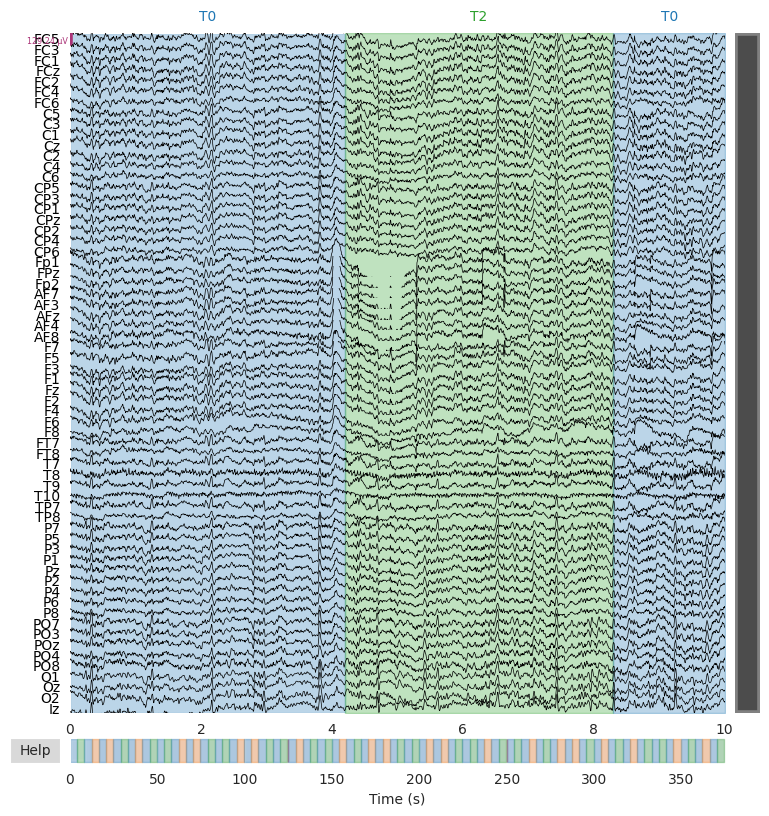

In [45]:
raw.plot(scalings="auto", n_channels=64, show=True)

Effective window size : 12.800 (s)
Plotting power spectral density (dB=True).


<IPython.core.display.Javascript object>

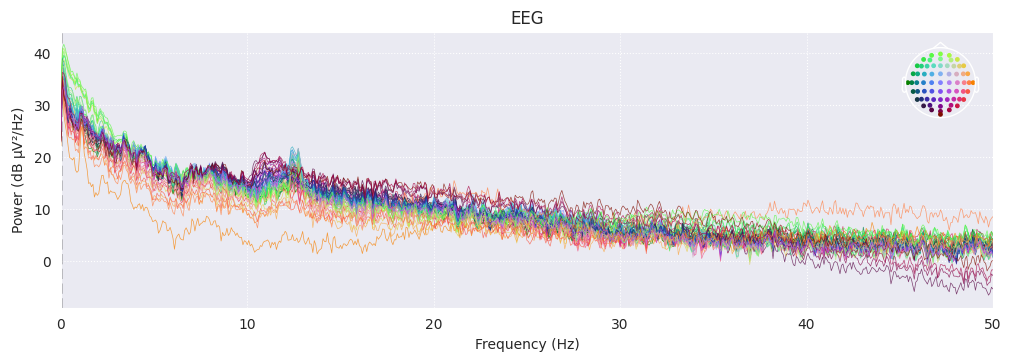

In [46]:
raw.compute_psd(fmax=50).plot(show=True)

### Проверка координат сенсоров

In [47]:
layout = mne.find_layout(raw.info)
print(layout.pos[:5])  # Просмотр первых 5 строк массива позиций

[[0.14264509 0.60731349 0.05216157 0.03970147]
 [0.24050744 0.60425651 0.05216157 0.03970147]
 [0.3496148  0.60445368 0.05216157 0.03970147]
 [0.47391921 0.60812493 0.05216157 0.03970147]
 [0.59822363 0.60445368 0.05216157 0.03970147]]


In [48]:
# Извлечение нестандартных координат
x_column = 0  # Номер столбца для координаты x (нумерация с нуля)
y_column = 1  # Номер столбца для координаты y

pos = layout.pos[:, [x_column, y_column]]  # Извлечение x и y координат

<IPython.core.display.Javascript object>

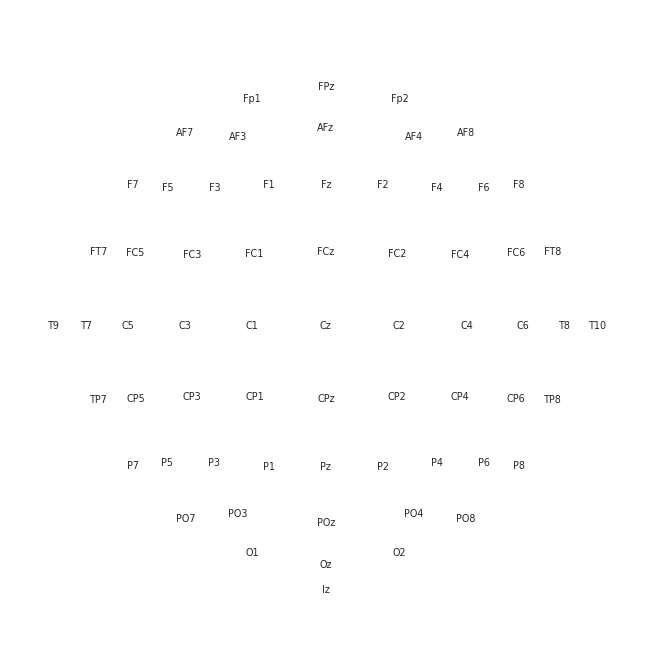

In [49]:
layout.plot()  # Проверка местоположения сенсоров

In [50]:
# Извлечение данных
data, times = raw[:, :1000]  # Первые 1000 временных отсчетов

# Средние значения сигналов по каналам
data_mean = data.mean(axis=1)

pos = np.array([ch["loc"][:2] for ch in raw.info["chs"]])

# Построение топографии
fig, ax = plt.subplots(figsize=(8, 8))
mne.viz.plot_topomap(
    data_mean,  # Значения для каналов
    pos,  # Координаты каналов
    ch_type="eeg",
    names=raw.ch_names,  # Подписи каналов
    sensors=True,  # Показать точки сенсоров
    cmap="RdBu_r",  # Цветовая карта
    contours=6,  # Количество контуров
    res=256,  # Высокое разрешение
    size=8,  # Увеличить размер топографии
    axes=ax,  # Указать, где рисовать
    show=True,  # Показать график
)

<IPython.core.display.Javascript object>

(<matplotlib.image.AxesImage at 0x7fe1519c8210>,
 <matplotlib.contour.QuadContourSet at 0x7fe15064b590>)

## Обработка и вывод

### без декомпозиции

In [51]:
# Преобразование аннотаций в события
events, event_id = mne.events_from_annotations(raw)

# Печать кодов событий
print("Коды событий:", event_id)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Коды событий: {'T0': 1, 'T1': 2, 'T2': 3}


In [52]:
# Определяем временные границы вокруг событий (например, -0.2 до 1.0 сек)
tmin, tmax = -0.2, 1.0  # Время в секундах относительно события

# Создаем эпохи
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=(None, 0), preload=True)

# Печать информации об эпохах
print(epochs)

Not setting metadata
90 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 90 events and 193 original time points ...
3 bad epochs dropped
<Epochs | 87 events (all good), -0.2 – 1 s (baseline -0.2 – 0 s), ~8.3 MB, data loaded,
 'T0': 42
 'T1': 21
 'T2': 24>


In [53]:
save_dir = Path("../.cache/eeg/topographies/by_events")

save_dir.mkdir(parents=True, exist_ok=True)

for event_name, event_code in event_id.items():
    evoked = epochs[event_name].average()

    pos = np.array([ch["loc"][:2] for ch in evoked.info["chs"]])

    fig, ax = plt.subplots(figsize=(8, 8))
    mne.viz.plot_topomap(
        evoked.data.mean(axis=1),
        pos,
        ch_type="eeg",
        names=evoked.ch_names,
        sensors=True,
        cmap="RdBu_r",
        contours=6,
        res=256,
        size=8,
        axes=ax,
        show=False,
    )

    filename = save_dir / f"topography_{event_name}.png"
    plt.savefig(filename)
    plt.close(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
save_dir = Path("../.cache/eeg/topographies/by_epochs_and_events")

save_dir.mkdir(parents=True, exist_ok=True)

for event_name, event_code in event_id.items():
    event_epochs = epochs[event_name]

    for i, epoch in enumerate(event_epochs.get_data()):
        data_mean = epoch.mean(axis=1)

        pos = np.array([ch["loc"][:2] for ch in event_epochs.info["chs"]])

        fig, ax = plt.subplots(figsize=(8, 8))
        mne.viz.plot_topomap(
            data_mean,
            pos,
            ch_type="eeg",
            names=event_epochs.ch_names,
            sensors=True,
            cmap="RdBu_r",
            contours=6,
            res=256,
            size=8,
            axes=ax,
            show=False,
        )

        filename = save_dir / f"topography_{event_name}_epoch_{i + 1}.png"

        plt.savefig(filename)
        plt.close(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### с декомпозицией

#### декомпозиция

In [55]:
gc.collect()
torch.cuda.synchronize()
torch.cuda.empty_cache()

In [56]:
# Получаем данные эпох в виде массива (n_epochs, n_channels, n_times)
epochs_data = epochs.get_data()  # (n_epochs, n_channels, n_times)
events = epochs.events  # Извлекаем события (events), которые представляют различные ивенты

# Список для хранения восстановленных эпох
reconstructed_epochs = []

In [57]:
# Проходим по каждой эпохе
for epoch_idx, epoch_data in enumerate(epochs_data):
    # Определяем ранк в зависимости от текущей итерации (например, чем выше итерация, тем ниже ранг)
    rank = [64, int(epoch_data.shape[1] / 15)]  # Ранг зависит от индекса эпохи

    with tl.backend_context("pytorch"):
        # Преобразуем данные эпохи в тензор
        tensor = tl.tensor(epoch_data).to("cuda")  # Добавляем новую ось для временного отсчета
        print(f"Tensor shape для эпохи {epoch_idx}: {tensor.shape}")

        # Вычисляем границы исходного тензора
        original_min = tensor.min().item()
        original_max = tensor.max().item()

        # Выполняем разложение Тукера для текущей эпохи
        weight, factors = tl.decomposition.tucker(
            tensor, rank=rank, svd="truncated_svd", init="random", random_state=42
        )

        # Восстанавливаем тензор
        reconstructed_tensor = tl.tucker_to_tensor((weight, factors))

        # Вычисляем границы восстановленного тензора до нормализации
        reconstructed_min = reconstructed_tensor.min().item()
        reconstructed_max = reconstructed_tensor.max().item()

        # Вычисляем Frobenius ошибку для текущей эпохи
        frobenius_error = 100.0 * (tl.norm(reconstructed_tensor - tensor) / tl.norm(tensor)).item()

        original_size = IMetricCalculator.get_tensors_size(tensor)
        compressed_size = IMetricCalculator.get_tensors_size(weight, *factors)

        compression_ratio = 100.0 * compressed_size / original_size

        # Нормализуем восстановленный тензор в границы исходного
        reconstructed_tensor_normalized = (reconstructed_tensor - reconstructed_min) / (
            reconstructed_max - reconstructed_min
        )
        reconstructed_tensor_normalized = reconstructed_tensor_normalized * (original_max - original_min) + original_min

        # Преобразуем нормализованный тензор в numpy
        reconstructed_epochs.append(reconstructed_tensor_normalized.squeeze().cpu().numpy())

        print(f"Epoch {epoch_idx}:")
        print(f"Original tensor min: {original_min}, max: {original_max}")
        print(f"Reconstructed tensor (before normalization) min: {reconstructed_min}, max: {reconstructed_max}")
        print(f"Frobenius Error для эпохи {epoch_idx}: {frobenius_error}")
        print(f"Compression Ration для эпохи {epoch_idx}: {compression_ratio:.4f}")

# Преобразуем восстановленные данные в numpy массив
reconstructed_epochs = np.array(reconstructed_epochs)

Tensor shape для эпохи 0: torch.Size([64, 193])
Epoch 0:
Original tensor min: -0.0005833939393939393, max: 0.00025560606060606055
Reconstructed tensor (before normalization) min: -0.0005810468095929655, max: 0.00024137304607329995
Frobenius Error для эпохи 0: 3.0470975638926907
Compression Ration для эпохи 0: 58.1282
Tensor shape для эпохи 1: torch.Size([64, 193])
Epoch 1:
Original tensor min: -0.00012378787878787877, max: 0.00015321212121212121
Reconstructed tensor (before normalization) min: -0.00012139270646153725, max: 0.0001394390463927098
Frobenius Error для эпохи 1: 12.158304807579503
Compression Ration для эпохи 1: 58.1282
Tensor shape для эпохи 2: torch.Size([64, 193])
Epoch 2:
Original tensor min: -0.00017569696969696967, max: 8.978787878787878e-05
Reconstructed tensor (before normalization) min: -0.00016569519505158024, max: 9.081263242544342e-05
Frobenius Error для эпохи 2: 10.2454498344405
Compression Ration для эпохи 2: 58.1282
Tensor shape для эпохи 3: torch.Size([64, 19

In [58]:
restored_data = reconstructed_epochs.transpose(1, 0, 2).reshape(epochs_data.shape[1], -1)

# Извлекаем информацию о каналах из объекта epochs
info = epochs.info  # Сохраняем ту же структуру информации о каналах

# Создаем новый объект Raw из восстановленных данных
raw_fixed = mne.io.RawArray(restored_data, info)

raw_fixed.info = raw.info.copy()

raw_fixed.set_annotations(raw.annotations)

Creating RawArray with float64 data, n_channels=64, n_times=16791
    Range : 0 ... 16790 =      0.000 ...   104.938 secs
Ready.


/tmp/ipykernel_153263/2428518066.py:11: RuntimeWarning: Omitted 68 annotation(s) that were outside data range.
  raw_fixed.set_annotations(raw.annotations)
/tmp/ipykernel_153263/2428518066.py:11: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_fixed.set_annotations(raw.annotations)


<RawArray | 64 x 16791 (104.9 s), ~8.3 MB, data loaded>

In [59]:
# data, times = raw[:, :]
#
# data = np.nan_to_num(data)
#
# ranks = [64, int(data.shape[1] / 2), 1]

In [60]:
# with tl.backend_context("pytorch"):
#     tensor = tl.tensor(data[..., np.newaxis]).to('cuda')

In [61]:
# with tl.backend_context("pytorch"):
#     weight, factors = tl.decomposition.tucker(tensor, rank=ranks, svd="truncated_svd", init='random', random_state=42)

In [62]:
# with tl.backend_context("pytorch"):
#     reconstructed_tensor = tl.tucker_to_tensor((weight, *factors))

In [63]:
# with tl.backend_context("pytorch"):
#     frobenius_error = 100.0 * (tl.norm(reconstructed_tensor - tensor) / tl.norm(tensor)).item()

In [64]:
# print(f"Frobenius Error: {frobenius_error:.4f}")

In [65]:
# original_size = IMetricCalculator.get_tensors_size(tensor)
# compressed_size = IMetricCalculator.get_tensors_size((weight, *factors))
#
# compression_ratio = 100.0 * compressed_size / original_size

In [66]:
# print(f"Compression Ratio: {compression_ratio:.4f}")

#### восстановление

In [67]:
# Обработаем аннотации и события для новых данных (если они есть)
events, event_id = mne.events_from_annotations(raw_fixed)

Used Annotations descriptions: ['T0', 'T1', 'T2']


In [68]:
events, event_id = mne.events_from_annotations(raw_fixed)
epochs = mne.Epochs(raw_fixed, events, event_id, tmin=-0.2, tmax=1.0, baseline=(None, 0), preload=True)

Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
26 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 26 events and 193 original time points ...
1 bad epochs dropped


In [69]:
save_dir = Path("../.cache/eeg/topographies/by_events_tucker")

save_dir.mkdir(parents=True, exist_ok=True)

for event_name, event_code in event_id.items():
    evoked = epochs[event_name].average()

    pos = np.array([ch["loc"][:2] for ch in evoked.info["chs"]])

    fig, ax = plt.subplots(figsize=(8, 8))
    mne.viz.plot_topomap(
        evoked.data.mean(axis=1),
        pos,
        ch_type="eeg",
        names=evoked.ch_names,
        sensors=True,
        cmap="RdBu_r",
        contours=6,
        res=256,
        size=8,
        axes=ax,
        show=False,
    )

    filename = save_dir / f"topography_{event_name}.png"
    plt.savefig(filename)
    plt.close(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
save_dir = Path("../.cache/eeg/topographies/by_epochs_and_events_tucker")

save_dir.mkdir(parents=True, exist_ok=True)

for event_name, event_code in event_id.items():
    event_epochs = epochs[event_name]

    for i, epoch in enumerate(event_epochs.get_data()):
        data_mean = epoch.mean(axis=1)

        pos = np.array([ch["loc"][:2] for ch in event_epochs.info["chs"]])

        fig, ax = plt.subplots(figsize=(8, 8))
        mne.viz.plot_topomap(
            data_mean,
            pos,
            ch_type="eeg",
            names=event_epochs.ch_names,
            sensors=True,
            cmap="RdBu_r",
            contours=6,
            res=256,
            size=8,
            axes=ax,
            show=False,
        )

        filename = save_dir / f"topography_{event_name}_epoch_{i + 1}.png"

        plt.savefig(filename)
        plt.close(fig)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>